# Introduction to Quantum Programming

This notebook contains the solution of the [TP] introduction to quantum programming (https://github.com/ugo-nzongani/Introduction-to-Quantum-Programming/blob/main/TP.pdf) with [Qiskit](https://qiskit.org/).


<img src="https://upload.wikimedia.org/wikipedia/commons/5/51/Qiskit-Logo.svg" style="height:300px" />

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.circuit import *
from qiskit.extensions import *
from qiskit.circuit.library import *
from qiskit.extensions.simulator.snapshot import snapshot
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
from qiskit.extensions.simulator.snapshot import snapshot
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import random_unitary
from qiskit.tools.monitor import job_monitor

In [2]:
# Function to run a quantum circuit
def run(qc, n_shots=1024, plot=True):
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc,backend,shots=n_shots)
    res = dict(job.result().get_counts(qc))
    if plot:
        return plot_histogram(res)
    else:
        return res

# Function to plot the Bloch Sphere
def bloch(qc):
    backend = BasicAer.get_backend('statevector_simulator')
    result = backend.run(transpile(qc, backend)).result()
    psi = result.get_statevector(qc)
    return plot_bloch_multivector(psi)

## First quantum circuits

1- Bloch Sphere representation

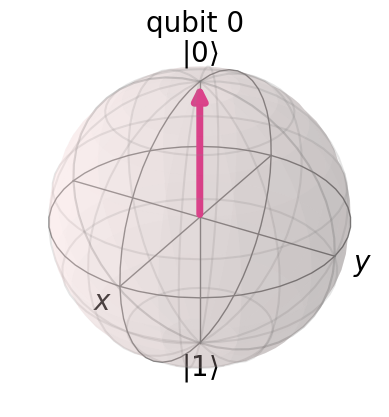

In [3]:
# |0>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
bloch(qc)

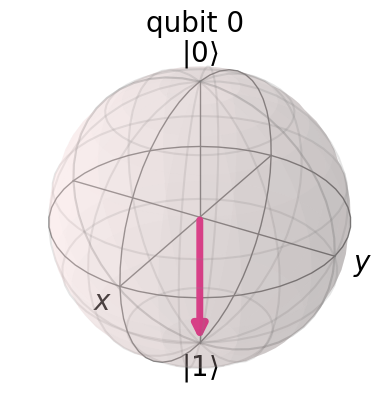

In [4]:
# |1>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q)
bloch(qc)

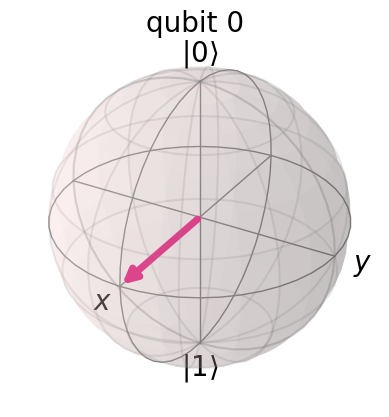

In [5]:
# |+>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q)
bloch(qc)

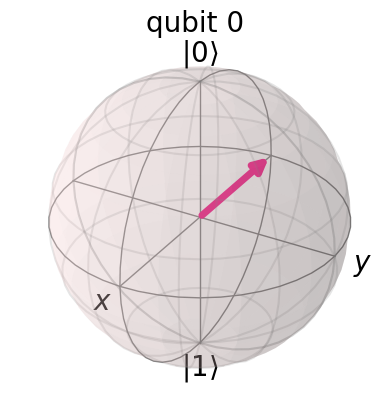

In [6]:
# |->
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q)
qc.h(q)
bloch(qc)

2- Bloch Sphere representation with two qubits

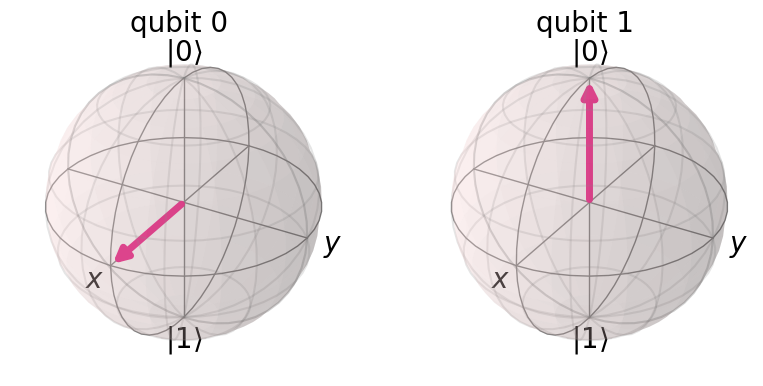

In [7]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.h(q[0])
bloch(qc)

3- Bloch Sphere representation of the Bell state

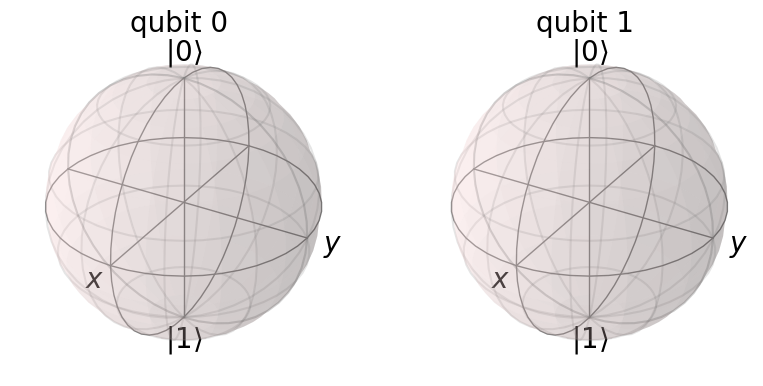

In [8]:
# |Bell>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.cnot(q[0],q[1])
bloch(qc)

The state is entangled, therefore it is not possible to describe the state of each qubit independently

4- Preparing an equal superposition for two qubits

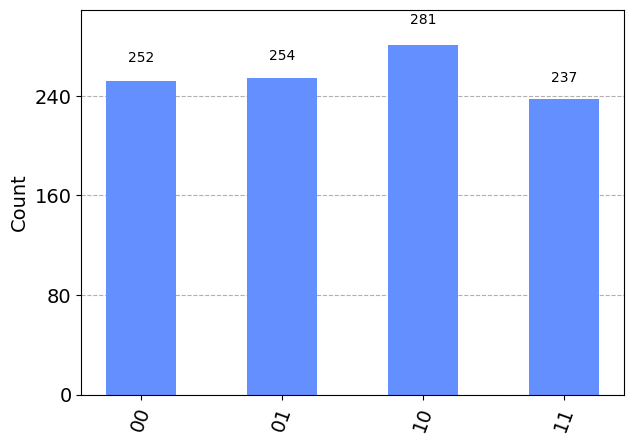

In [9]:
q = QuantumRegister(2, name='q')
c = ClassicalRegister(2, name='c')
qc = QuantumCircuit(q,c)
qc.h(q)
qc.measure(q,c)
run(qc)

5- Preparing an EPR pair on 3 qubits

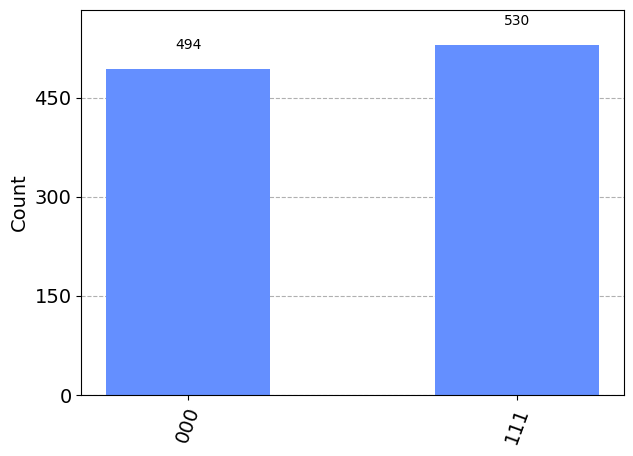

In [10]:
q = QuantumRegister(3, name='q')
c = ClassicalRegister(3, name='c')
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.cnot(q[0],q[1])
qc.cnot(q[0],q[2])
qc.measure(q,c)
run(qc)

6- Preparing a special state on 3 qubits

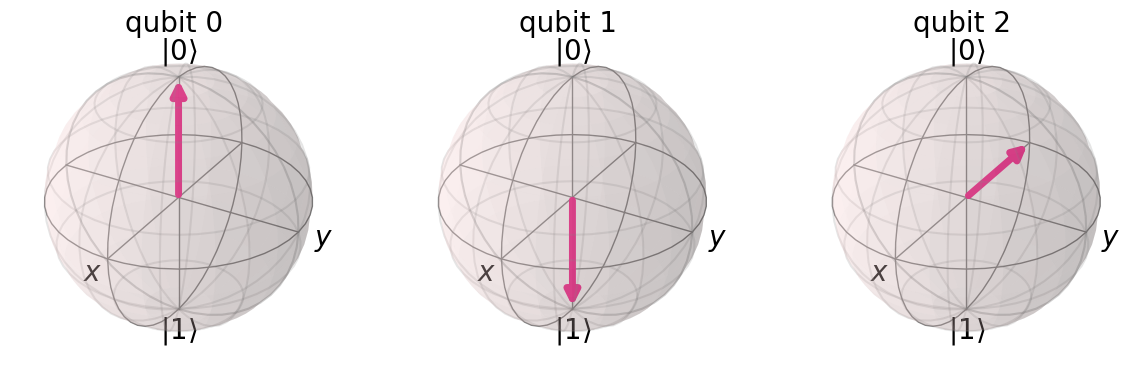

In [11]:
q = QuantumRegister(3, name='q')
c = ClassicalRegister(3, name='c')
qc = QuantumCircuit(q,c)
qc.x(q[2])
qc.h(q[2])
qc.y(q[1])
bloch(qc)

7- Swap of an arbitrary quantum state

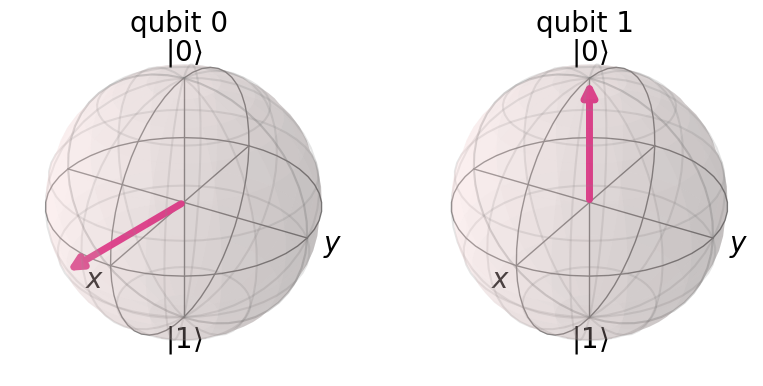

In [12]:
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
u = random_unitary(2)
qc.unitary(u, q[0], label='U')
bloch(qc)

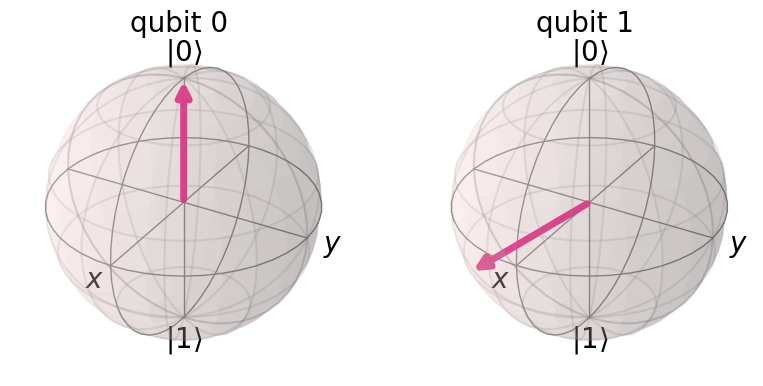

In [13]:
qc.swap(q[0],q[1])
bloch(qc)

8- Mirror transformation

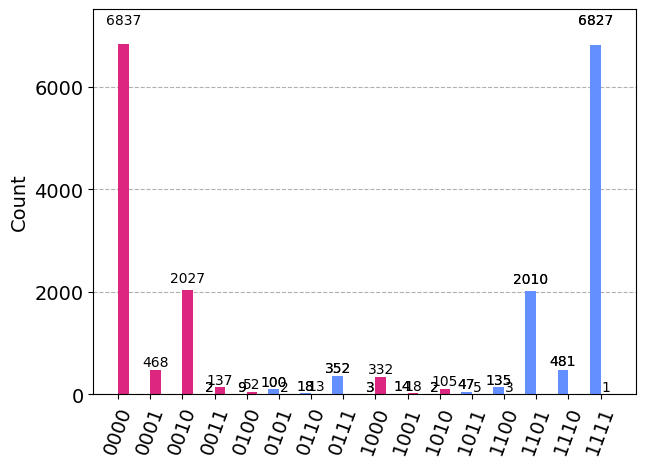

In [14]:
n = 4
unitaries = [random_unitary(2) for i in range(n)]

# qc1
q1 = QuantumRegister(n, name='q')
c1 = ClassicalRegister(n, name='c')
qc1 = QuantumCircuit(q1,c1)

# qc2
q2 = QuantumRegister(n, name='q')
c2 = ClassicalRegister(n, name='c')
qc2 = QuantumCircuit(q2,c2)
qc2.x(q2)

# Applying the unitaries on qc1 and qc2
for i in range(n):
    qc1.unitary(unitaries[i],q1[i],label='U'+str(i))
    qc2.unitary(unitaries[i],q2[i],label='U'+str(i))
    
# Measurements
qc1.measure(q1,c1)
qc2.measure(q2,c2)


qc1_res = run(qc1,n_shots=10000,plot=False)
qc2_res = run(qc2,n_shots=10000,plot=False)
plot_histogram([qc1_res,qc2_res])

## Cloning qubits ?

1- Single copy in the computational basis

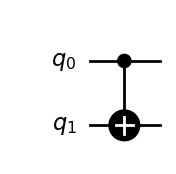

In [15]:
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
qc.cnot(q[0],q[1])
qc.draw('mpl', style='bw')

2- Same with second qubit in state 1

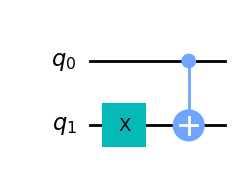

In [16]:
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
qc.x(q[1])
qc.cnot(q[0],q[1])
qc.draw('mpl')

3- Copy of an $n$ qubit string

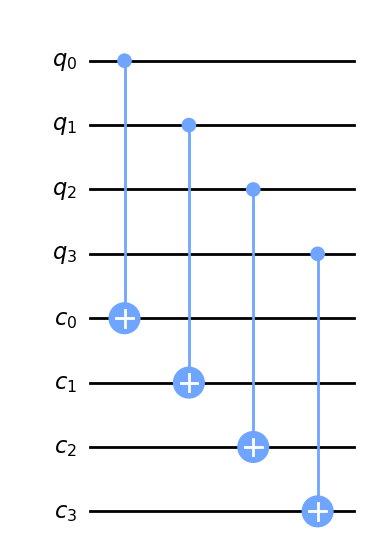

In [17]:
n = 4

q = QuantumRegister(n, name='q')
c = QuantumRegister(n, name='c')
qc = QuantumCircuit(q,c)

for i in range(n):
    qc.cnot(q[i],c[i])
    
qc.draw('mpl')

4- Swap of two arbitrary states

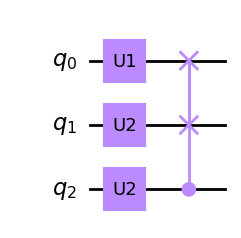

In [18]:
q = QuantumRegister(3, name='q')
qc = QuantumCircuit(q)
qc.unitary(random_unitary(2), q[0], label='U1')
qc.unitary(random_unitary(2), q[1], label='U2')
qc.unitary(random_unitary(2), q[2], label='U2')
qc.cswap(q[2],q[0],q[1])
qc.draw('mpl')

5- Two gates on a single qubit state

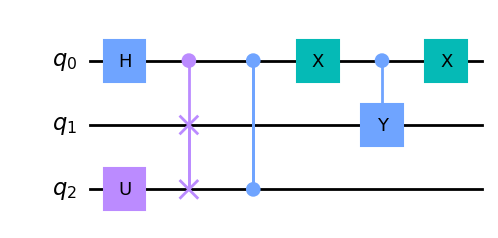

In [19]:
q = QuantumRegister(3,name='q')
qc = QuantumCircuit(q)
qc.unitary(random_unitary(2),q[2],label='U')
qc.h(q[0])
qc.cswap(q[0],q[1],q[2])
qc.cz(q[0],q[2])
qc.x(q[0])
qc.cy(q[0],q[1])
qc.x(q[0])
qc.draw('mpl')

6- Bonus: naive and efficient copies

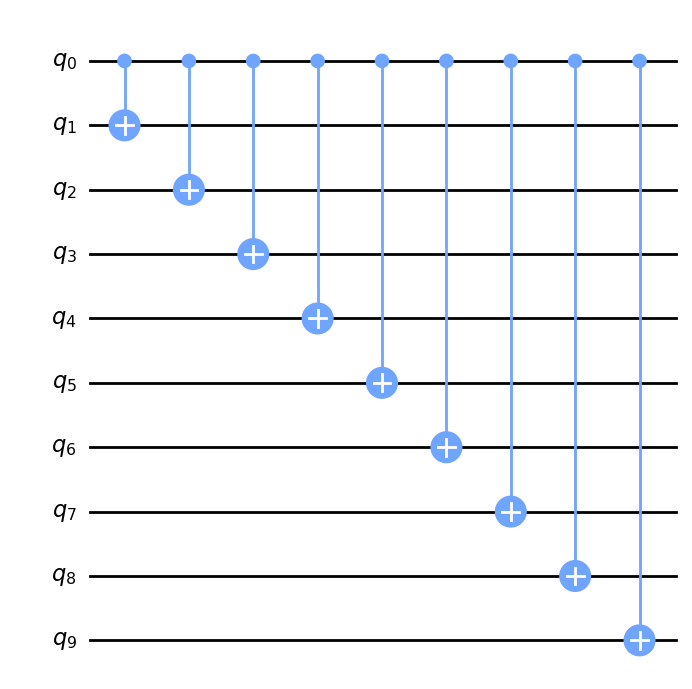

In [20]:
# Naive method
def naive_method(n):
    q = QuantumRegister(n,name='q')
    qc = QuantumCircuit(q)
    current_index = 1
    for i in range(n-1):
        qc.cnot(q[0],q[current_index])
        current_index += 1
    return qc

naive_method(10).draw('mpl')

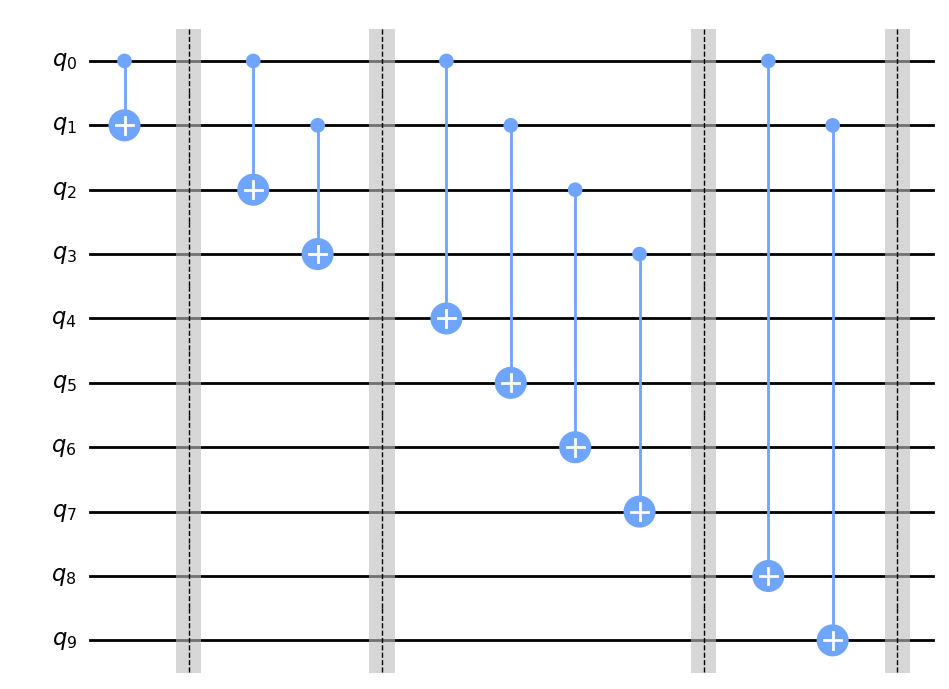

In [21]:
# Efficient method: the key here is to increase at each step the number of qubit performing a copy
def efficient_method(n):
    q = QuantumRegister(n,name='q')
    qc = QuantumCircuit(q)
    n_copy_done = 0
    for i in range(1+int(np.floor(np.log2(n)))):
        for j in range(2**i):
            if n_copy_done < n-1:
                qc.cnot(q[j],q[j+2**i])
                n_copy_done += 1
        qc.barrier()
    return qc

efficient_method(10).draw('mpl')

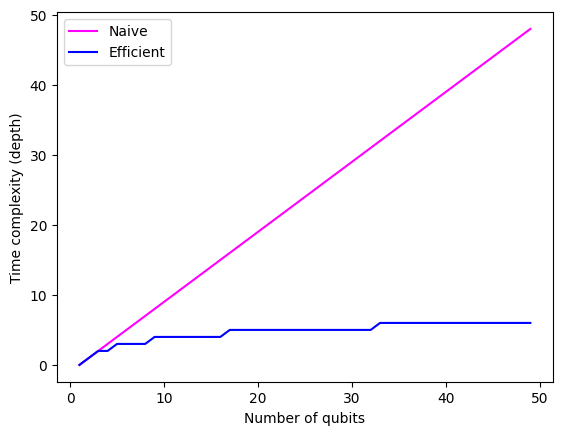

In [22]:
# Comparaison of the depth scaling between the naive and efficient methods
x = np.arange(1,50)
naive_depth = [naive_method(n).depth() for n in x]
efficient_depth = [efficient_method(n).depth() for n in x]
plt.plot(x,naive_depth, label='Naive', color='magenta')
plt.plot(x,efficient_depth, label='Efficient', color='blue')
plt.legend()
plt.xlabel('Number of qubits')
plt.ylabel('Time complexity (depth)')
plt.show()

## Single qubit interference

1- Single qubit interference implementation

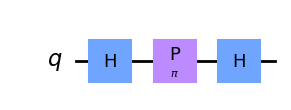

In [23]:
phi = np.pi

q = QuantumRegister(1,name='q')
qc = QuantumCircuit(q)
qc.h(q)
qc.p(phi,q)
qc.h(q)

qc.draw('mpl')

2- Plot the 0 probability for different phases

Text(0, 0.5, 'Probability of measuring 0')

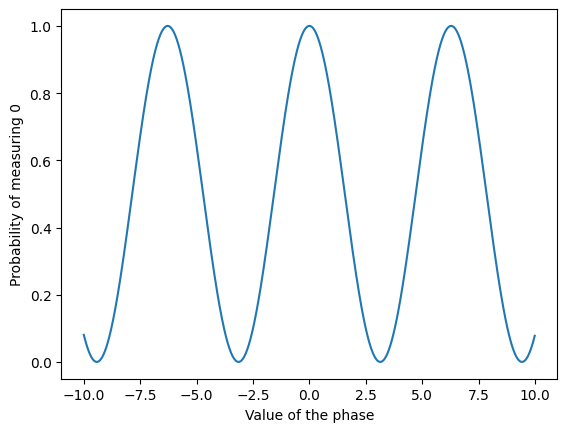

In [24]:
def prob_zero(phase):
    return (1+np.cos(phase))/2

x = np.arange(-10, 10, 0.01)
prob = np.array([prob_zero(i) for i in x])
plt.plot(x,prob)
plt.xlabel('Value of the phase')
plt.ylabel('Probability of measuring 0')

## Superdense Coding

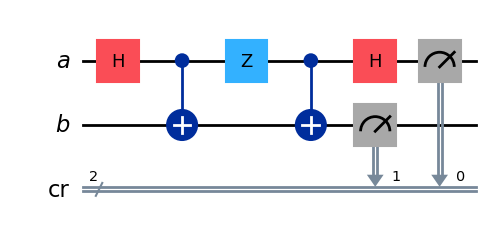

In [25]:
def superdense_coding(b2,b1):
    a = QuantumRegister(1,name='a')
    b = QuantumRegister(1,name='b')
    cr = ClassicalRegister(2,name='cr')
    qc = QuantumCircuit(a,b,cr)
    qc.h(a)
    qc.cnot(a,b)
    if b2 == 1:
        qc.x(a)
    if b1 == 1:
        qc.z(a)
    qc.cnot(a,b)
    qc.h(a)
    qc.measure(a,cr[0])
    qc.measure(b,cr[1])
    return qc

qc = superdense_coding(0,1)
qc.draw('mpl', style='iqx')

## Quantum Teleportation

1- Implementation of the Quantum Teleportation protocol

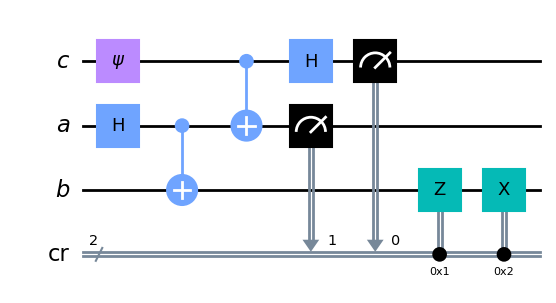

In [26]:
def before_TP(psi):
    c = QuantumRegister(1,name='c')
    a = QuantumRegister(1,name='a')
    b = QuantumRegister(1,name='b')
    qc = QuantumCircuit(c,a,b)
    qc.unitary(psi,c,label='$\psi$')
    qc.h(a)
    qc.cnot(a,b)
    return qc    
    
def Quantum_TP(psi):
    c = QuantumRegister(1,name='c')
    a = QuantumRegister(1,name='a')
    b = QuantumRegister(1,name='b')
    cr = ClassicalRegister(2,name='cr')
    qc = QuantumCircuit(c,a,b,cr)

    qc.unitary(psi,c,label='$\psi$')
    qc.h(a)
    qc.cnot(a,b)
    qc.cnot(c,a)
    qc.h(c)

    qc.measure(c,cr[0])
    qc.measure(a,cr[1])

    qc.z(2).c_if(cr, 1)
    qc.x(2).c_if(cr, 2)
    return qc

qc = Quantum_TP(random_unitary(2))
qc.draw('mpl')

2- Plot of the Bloch Sphere before and after teleporation of $|\psi>$

Before teleportation:


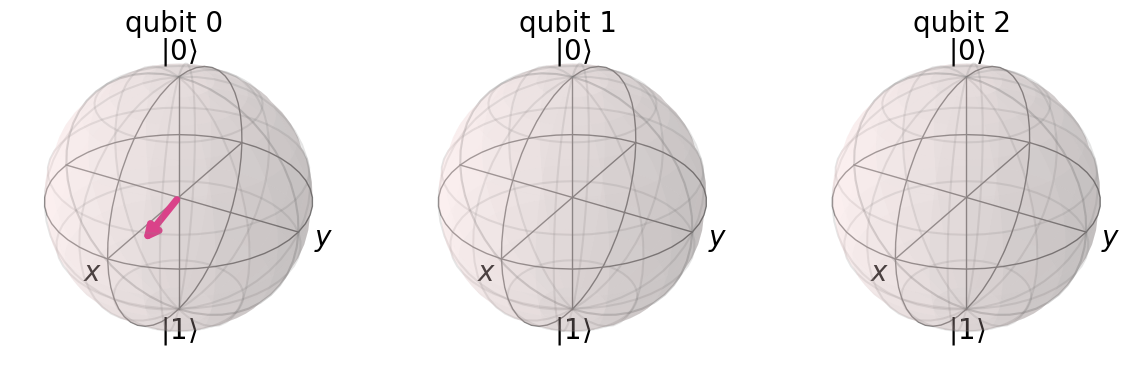

In [27]:
random_state = random_unitary(2)
qc_before = before_TP(random_state)
qc_after = Quantum_TP(random_state)
print('Before teleportation:')
bloch(qc_before)

After teleportation:


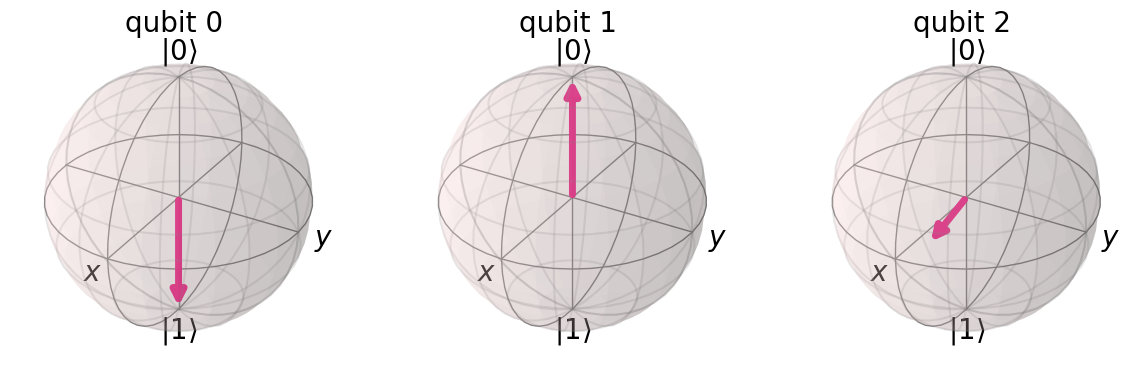

In [28]:
print('After teleportation:')
bloch(qc_after)

## Quantum Fourier Transform

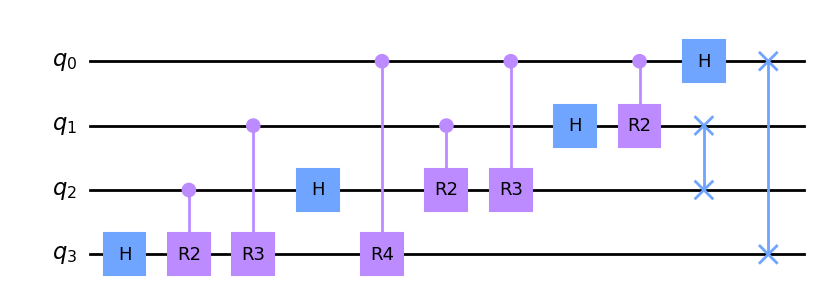

In [29]:
def qft_rotations(k):
    return np.array([[1,0],[0,np.exp(2*np.pi*1j/2**k)]])

def qft(n,swaps=True):
    q = QuantumRegister(n,name='q')
    qc = QuantumCircuit(q)
    # Rotations and Hadamards
    for i in range(n):
        qc.h(q[n-i-1])
        for j in range(2,n+1-i):
            gate = UnitaryGate(qft_rotations(j),label='R'+str(j))
            qc.append(gate.control(),[q[n-i-j],q[n-i-1]])
            #qc.append(U1Gate(2*np.pi/2**j,label='R'+str(j)).control(1),[q[n-i-j],q[n-i-1]])
    # Swaps
    if swaps:
        for i in range(n//2):
            qc.swap(q[i],q[n-i-1])
    
    return qc
    
qc = qft(4)
qc.draw('mpl')

## Quantum Phase Estimation

1- Implementation of QPE

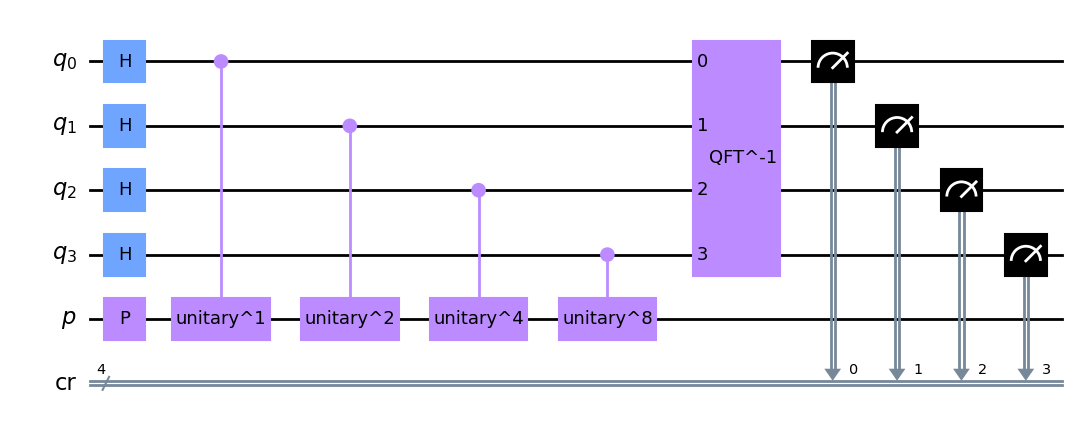

In [30]:
def QPE(n,psi,U):
    q = QuantumRegister(n,name='q')
    p = QuantumRegister(1,name='p')
    cr = ClassicalRegister(n,name='cr')
    qc = QuantumCircuit(q,p,cr)
    inverse_qft = qft(n).inverse().to_gate(label='QFT^-1')
    qc.h(q)
    qc.unitary(psi,p,label='P')
    for i in range(n):
        gate = UnitaryGate(U,label='U^'+str(i))
        qc.append(gate.power(2**i).control(),[q[i],p])
    qc.append(inverse_qft,[k for k in q])
    qc.measure(q,cr)
    return qc

U = np.array([[1,0],[0,-1]]) # Z gate
psi = np.array([[1,0],[0,1]]) # I
qc = QPE(4,psi,U)
qc.draw('mpl')

2- Approximation of $\pi$

a- Computation

In [31]:
def estimate_pi(n):
    U = np.array([[1,0],[0,np.exp(1j)]])
    psi = np.array([[0,1],[1,0]]) # X
    qc = QPE(n,psi,U)
    res = run(qc,plot=False,n_shots=10000)
    phase = int(max(res, key=res.get),2)/2**n
    pi = 1/(2*phase)
    return pi

b- Plot

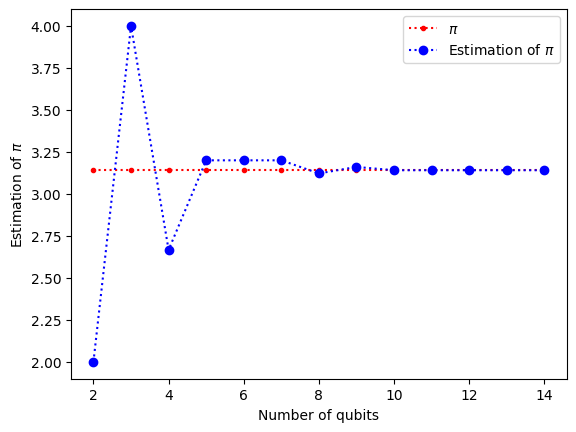

In [32]:
x = [n for n in range(2,15)]
y = [estimate_pi(n) for n in x]
pi = [np.pi for i in x]
plt.plot(x,pi,label='$\pi$',color='red',marker='.',linestyle='dotted')
plt.plot(x,y,label='Estimation of $\pi$',color='blue',marker='o',linestyle='dotted')
plt.legend()
plt.xlabel('Number of qubits')
plt.ylabel('Estimation of $\pi$')
plt.show()

## Draper Adder

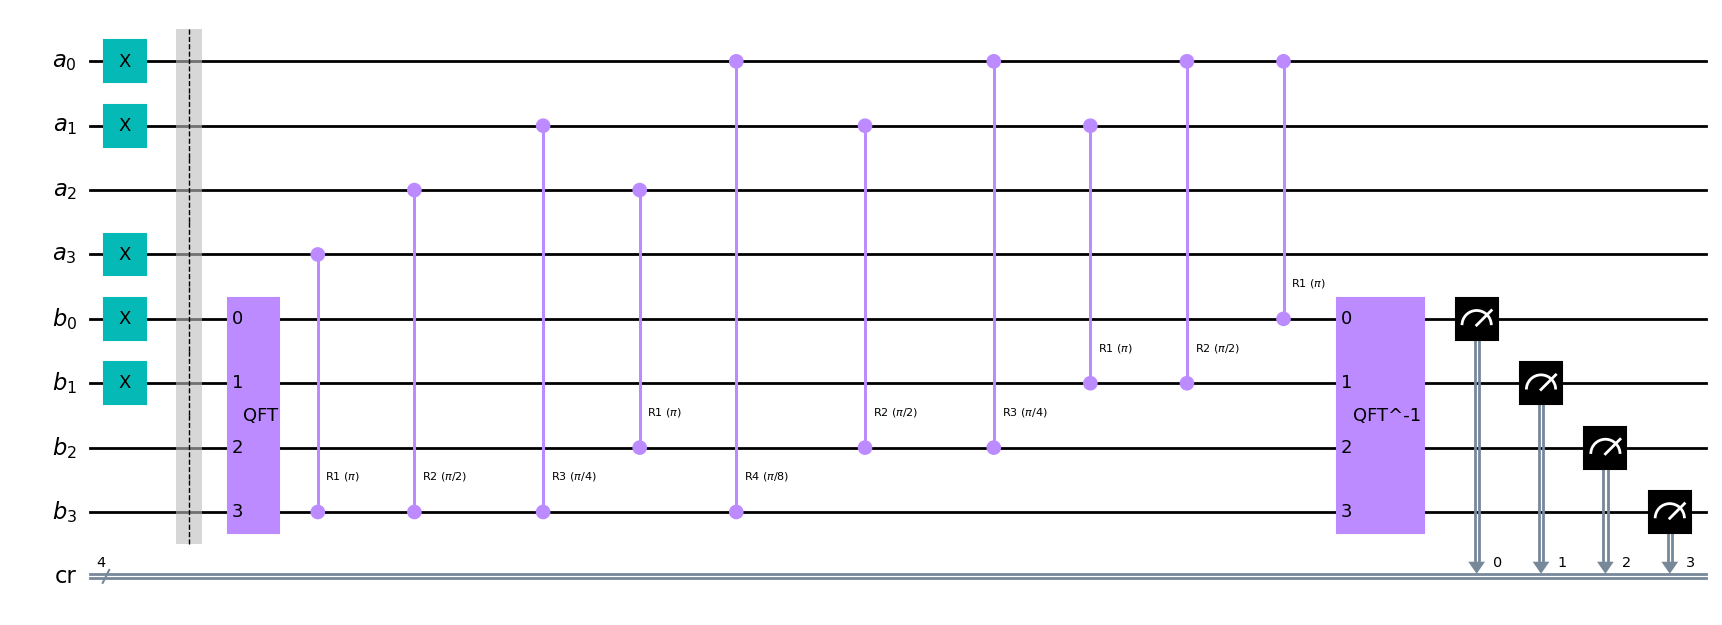

In [33]:
def draper_rotations(k):
    return np.array([[1,0],[0,np.exp(1j/2**k)]])

def Draper_Adder(x,y):
    # Finding the number of qubits needed
    n = max(len(bin(x)[2:].zfill(0)),len(bin(y)[2:].zfill(0)))
    x_binary = bin(x)[2:].zfill(n)[::-1]
    y_binary = bin(y)[2:].zfill(n)[::-1]
    a = QuantumRegister(n,name='a')
    b = QuantumRegister(n,name='b')
    cr = ClassicalRegister(n,name='cr')
    qc = QuantumCircuit(a,b,cr)

    # Initialization of the registers
    for i in range(n):
        if x_binary[i] == '1':
            qc.x(a[i])
        if y_binary[i] == '1':
            qc.x(b[i])
    qc.barrier()
    
    # Draper Adder
    qft_gate = qft(n,swaps=False).to_gate(label='QFT')
    inverse_qft = qft(n,swaps=False).inverse().to_gate(label='QFT^-1')
    qc.append(qft_gate,[i for i in b])
    for i in range(n):
        for j in range(n-i):
            qc.append(U1Gate(2*np.pi/2**(j+1),label='R'+str(j+1)).control(1),[a[n-i-j-1],b[n-i-1]])
    qc.append(inverse_qft,[i for i in b])
    qc.measure(b,cr)
    return qc

qc = Draper_Adder(11,3)
qc.draw('mpl')

In [34]:
# Function to verify if the Draper Adder is correctly implemented
def verification(x,y):
    n = max(len(bin(x)[2:].zfill(0)),len(bin(y)[2:].zfill(0)))
    outcome = run(Draper_Adder(x,y),plot=False)
    return bin((x+y)%2**n)[2:].zfill(n) == list(outcome.keys())[0]

verification(367,43)

True

## Bernstein-Vazirani Algorithm

Random bit string: 0110100111


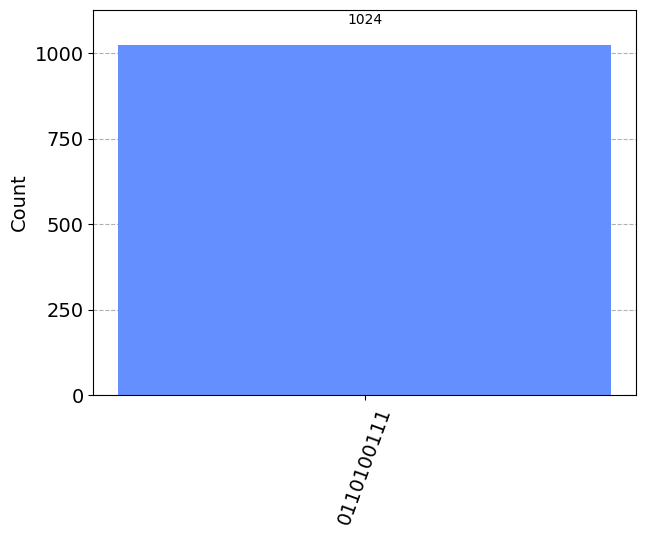

In [35]:
def rand_string(n):
    key = ""
    for i in range(n):
        temp = str(random.randint(0, 1))
        key += temp       
    return key


def bernstein_vazirani(n):
    secretnumber = rand_string(n)
    qc = QuantumCircuit(n+1,n)

    qc.h(range(n))
    qc.x(n)
    qc.h(n)

    qc.barrier()

    for index, bit in enumerate(reversed(secretnumber)):
        if bit == '1':
            qc.cx(index,n)

    qc.barrier()

    qc.h(range(n))

    qc.measure(range(n),range(n))
    print('Random bit string:',secretnumber)
    return qc

n = 10
qc = bernstein_vazirani(n)
run(qc)